In [2]:
import numpy as np
from functions import *
import dill
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
from PIL import Image

In [9]:
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

def area_cost(s1,s2,v1,v2,step_s,step_v,path=exp_path):
    grid=[]
    print('Calculate lost of sigma[%.2f,%.2f) & volume[%.2f,%.2f)'%(s1,s2,v1,v2))
    list_s=np.arange(s1,s2,step_s)
    list_v=np.arange (v1,v2,step_v)
    for i in tqdm(list_s):
        for j in list_v:
            lost=likelihood(sv=np.asarray((i,j)),output=0,path_exp=path)
            grid.append(np.asarray((i,j,lost)))
    return grid

def lhood_gamma(v,path):
    lhood1=area_cost(v1=v,v2=v+1,step_v=1,s1=1,s2=26,step_s=1,path=path)
    lhood2=area_cost(v1=v,v2=v+1,step_v=1,s1=26,s2=51,step_s=1,path=path)
    lhood3=area_cost(v1=v,v2=v+1,step_v=1,s1=51,s2=76,step_s=1,path=path)
    lhood4=area_cost(v1=v,v2=v+1,step_v=1,s1=76,s2=101,step_s=1,path=path)
    lhood5=area_cost(v1=v,v2=v+1,step_v=1,s1=101,s2=126,step_s=1,path=path)
    lhood6=area_cost(v1=v,v2=v+1,step_v=1,s1=126,s2=151,step_s=1,path=path)
    
    lhood=np.hstack((np.asarray(lhood1)[:,2],
                np.asarray(lhood2)[:,2],
                np.asarray(lhood3)[:,2],
                np.asarray(lhood4)[:,2],
                np.asarray(lhood5)[:,2],
                np.asarray(lhood6)[:,2],
                ))

    lhood=1-lhood[:]
    lhood[lhood<0]=0
    
    return lhood


In [ ]:
def lhood_volume(gamma):
    lhood1=area_cost(v1=1,v2=26,step_v=0.5,s1=gamma,s2=gamma+1,step_s=1)
    lhood2=area_cost(v1=26,v2=51,step_v=0.5,s1=gamma,s2=gamma+1,step_s=1)

    lhood=np.hstack((np.asarray(lhood1)[:,2],np.asarray(lhood2)[:,2]))

    return lhood


In [10]:
exp_path='./images_notupload/s75.00_v9.00_n0.50.jpg'
lhood=lhood_gamma(9,exp_path)

Calculate lost of sigma[1.00,26.00) & volume[9.00,10.00)


100%|██████████| 25/25 [00:25<00:00,  1.02s/it]


Calculate lost of sigma[26.00,51.00) & volume[9.00,10.00)


100%|██████████| 25/25 [00:48<00:00,  1.94s/it]


Calculate lost of sigma[51.00,76.00) & volume[9.00,10.00)


100%|██████████| 25/25 [00:44<00:00,  1.78s/it]


Calculate lost of sigma[76.00,101.00) & volume[9.00,10.00)


100%|██████████| 25/25 [00:49<00:00,  2.00s/it]


Calculate lost of sigma[101.00,126.00) & volume[9.00,10.00)


100%|██████████| 25/25 [00:44<00:00,  1.79s/it]


Calculate lost of sigma[126.00,151.00) & volume[9.00,10.00)


100%|██████████| 25/25 [00:38<00:00,  1.54s/it]


In [13]:
# save all varables
import dill
filename='./likelihood_s75v9_vis9.pkl'
dill.dump_session(filename)

In [11]:
list_s=np.arange (1,151,1)

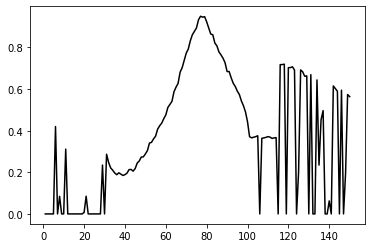

In [12]:
plt.plot(list_s[:],lhood[:],'black')